# Leistungsnachweis – Analyse das zweiten Datensatzes
# Geschlechterunterschiede beim Sprechen über psychische Probleme: Ein internationaler Vergleich (2020)
Psychische Gesundheit spielt weltweit eine wichtige Rolle, wird jedoch in verschiedenen Ländern und Kulturen unterschiedlich thematisiert. Besonders beim Sprechen über Angststörungen und Depressionen zeigen sich Unterschiede zwischen Männern und Frauen.
In diesem Leistungsnachweis werden ausgewählte Länder aus verschiedenen Weltregionen miteinander verglichen, um Unterschiede im Geschlechtervergleich beim Sprech-Unbehagen über psychische Probleme zu analysieren. Die Grundlage bildet ein Datensatz von Our World in Data.



## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Geschlechterunterschiede beim Sprechen über psychische Probleme: Ein internationaler Vergleich
### 1.2 Fragestellung:
- Unterscheiden sich Geschlechterunterschiede im Sprech-Unbehagen über psychische Probleme zwischen Ländern mit unterschiedlichem Einkommensniveau?
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare


- https://ourworldindata.org/grapher/discomfort-speaking-anxiety-depression-by-gender

### 1.4 Daten beschaffen und laden

In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

df_2020 = df[df["Year"] == 2020]



# Erste Zeilen anzeigen
df_2020.head()


# Erklärung der Variablen 
# Entity: Name des Landes
# Code: ISO-Ländercode
# Year: Jahr der Datenerhebung

# Share ... Gender: male:
# Anteil (%) der Männer, die sich nicht wohl fühlen,
# über Angst oder Depression zu sprechen

# Share ... Gender: female:
# Anteil (%) der Frauen, die sich nicht wohl fühlen,
# über Angst oder Depression zu sprechen

# Population: Bevölkerung des Landes
# World region according to OWID: Zugehörige Weltregion


,Entity,Code,Year,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all,Population,World region according to OWID
257,Afghanistan,AFG,2020,NaN,NaN,3.906898e+07,NaN
338,Africa,NaN,2020,27.313850,25.934032,1.380821e+09,NaN
746,Africa (UN),NaN,2020,NaN,NaN,1.380821e+09,NaN
831,Albania,ALB,2020,26.787529,28.347052,2.871950e+06,NaN
1169,Algeria,DZA,2020,13.632193,9.124729,4.404209e+07,NaN


## 2. Daten vorbereiten 
Der Datensatz liegt im Wide-Format vor, da die Anteile für Männer und Frauen in getrennten Spalten gespeichert sind und jede Zeile ein Land in einem bestimmten Jahr beschreibt. Für direkte Vergleiche zwischen Männern und Frauen sowie zwischen Ländern und Weltregionen wird dieses Format verwendet. Eine Umwandlung in ein Long-Format wäre sinnvoll, falls das Geschlecht als eigene Variable analysiert oder gruppiert werden soll.

Der Datensatz enthält sowohl kategoriale Variablen (Land, Weltregion, Geschlecht) als auch numerische Variablen (Jahr, Prozentwerte der Befragten, Bevölkerung). Fehlende Werte treten auf, wenn für bestimmte Länder oder Jahre keine Daten verfügbar sind.

In [31]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")
df_2020 = df[df["Year"] == 2020]



# Erste Zeilen anzeigen
df_2020.head()


male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Zufällige Länder auswählen (max. 5)
df_random = df[["Entity", male_col, female_col]].dropna().sample(5, random_state=42)

# Tabelle anzeigen (ohne Index)
df_random.style.hide(axis="index")


Entity,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all
Canada,34.832066,25.583342
Hong Kong,45.868176,59.001286
India,17.763678,15.467589
Poland,37.076504,33.448235
Asia,25.107258,28.115084


78571

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [41]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur auf das Jahr 2020 filtern
df_2020 = df[df["Year"] == 2020]

# Datentypen als Tabelle anzeigen (ohne Index)
df_2020.dtypes.reset_index() \
    .rename(columns={"index": "Spalte", 0: "Datentyp"}) \
    .style.hide(axis="index")


Spalte,Datentyp
Entity,object
Code,object
Year,int64
Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all,float64
Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all,float64
Population,float64
World region according to OWID,object


In [17]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Long-Format
df_long = df.melt(
    id_vars=["Entity", "World region according to OWID"],
    value_vars=[male_col, female_col],
    var_name="Gender",
    value_name="Share_not_comfortable"
)

df_long["Gender"] = df_long["Gender"].apply(
    lambda x: "Male" if "male" in x.lower() else "Female"
)

df_long.head(5).style.hide(axis="index")


Entity,World region according to OWID,Gender,Share_not_comfortable
Afghanistan,nan,Male,nan
Africa,nan,Male,27.313850
Africa (UN),nan,Male,nan
Albania,nan,Male,26.787529
Algeria,nan,Male,13.632193


In [19]:
import pandas as pd

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Auf Jahr 2020 filtern
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Tabelle: Anzahl Datenpunkte und fehlende Werte
summary = pd.DataFrame({
    "Anzahl_Datenpunkte": df[[male_col, female_col]].count(),
    "Fehlende_Werte": df[[male_col, female_col]].isna().sum()
})

summary.style.hide(axis="index")


Anzahl_Datenpunkte,Fehlende_Werte
123,134
123,134


3.2 
Die Variable Share_not_comfortable ist kontinuierlich, da sie Prozentwerte annimmt.
Die Variable Gender ist diskret mit zwei Klassen (Male, Female).

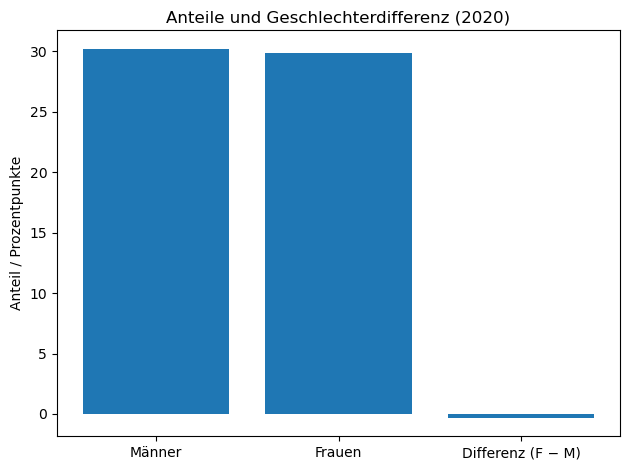

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Durchschnittswerte berechnen
mean_male = df[male_col].mean()
mean_female = df[female_col].mean()

# Differenz berechnen
difference = mean_female - mean_male

# Diagramm: Anteile + Differenz
plt.figure()
plt.bar(
    ["Männer", "Frauen", "Differenz (F − M)"],
    [mean_male, mean_female, difference]
)

plt.ylabel("Anteil / Prozentpunkte")
plt.title("Anteile und Geschlechterdifferenz (2020)")
plt.tight_layout()
plt.show()


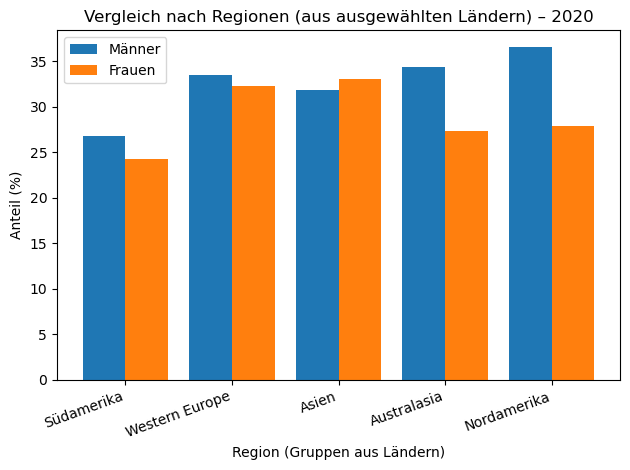

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

# Nur Jahr 2020
df = df[df["Year"] == 2020]

male_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: male - Age group: all"
female_col = "Share - Question: mh5 - Someone local comfortable speaking about anxiety/depression with someone they know - Answer: Not at all comfortable - Gender: female - Age group: all"

# Länder -> Region (wie von dir gewünscht)
region_map = {
    "Brazil": "Südamerika",
    "Peru": "Südamerika",
    "Argentina": "Südamerika",

    "France": "Western Europe",
    "Germany": "Western Europe",
    "Spain": "Western Europe",

    "China": "Asien",
    "Japan": "Asien",
    "India": "Asien",
    "Indonesia": "Asien",

    "Australia": "Australasia",

    "United States": "Nordamerika",
    "Canada": "Nordamerika",
}

# Nur die gewünschten Länder nehmen
df_sel = df[df["Entity"].isin(region_map.keys())].copy()

# Region-Spalte hinzufügen
df_sel["Region"] = df_sel["Entity"].map(region_map)

# Nur Zeilen mit echten Werten behalten
df_sel = df_sel.dropna(subset=[male_col, female_col, "Region"])

# Mittelwerte pro Region berechnen
region_means = df_sel.groupby("Region")[[male_col, female_col]].mean()

# Reihenfolge wie gewünscht
order = ["Südamerika", "Western Europe", "Asien", "Australasia", "Nordamerika"]
region_means = region_means.reindex([r for r in order if r in region_means.index])

# Diagramm (nebeneinander)
x = range(len(region_means.index))
width = 0.4

plt.figure()
plt.bar([i - width/2 for i in x], region_means[male_col].values, width=width, label="Männer")
plt.bar([i + width/2 for i in x], region_means[female_col].values, width=width, label="Frauen")

plt.xticks(list(x), list(region_means.index), rotation=20, ha="right")
plt.xlabel("Region (Gruppen aus Ländern)")
plt.ylabel("Anteil (%)")
plt.title("Vergleich nach Regionen (aus ausgewählten Ländern) – 2020")
plt.legend()
plt.tight_layout()
plt.show()






## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



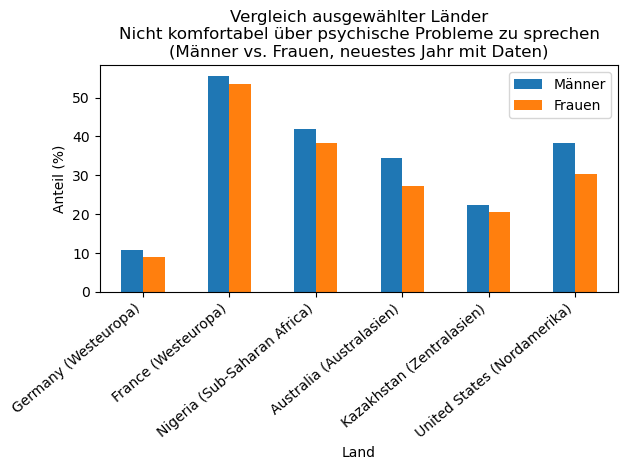

In [8]:
# =========================
# 1. IMPORTS
# =========================
import pandas as pd
import matplotlib.pyplot as plt


# =========================
# 2. DATEN LADEN
# =========================
# ACHTUNG: Pfad ggf. anpassen!
df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

male_col = [c for c in df.columns if "male" in c.lower()][0]
female_col = [c for c in df.columns if "female" in c.lower()][0]


# =========================
# 3. LÄNDER DEFINIEREN
# =========================
countries = {
    "Germany (Westeuropa)": "Germany",
    "France (Westeuropa)": "France",
    "Nigeria (Sub-Saharan Africa)": "Nigeria",
    "Australia (Australasien)": "Australia",
    "Kazakhstan (Zentralasien)": "Kazakhstan",
    "United States (Nordamerika)": "United States"
}


# =========================
# 4. DATEN SAMMELN
# =========================
rows = []

for label, country in countries.items():
    df_c = df[df["Entity"] == country]
    df_c = df_c.dropna(subset=[male_col, female_col])

    if not df_c.empty:
        row = df_c.sort_values("Year").iloc[-1]
        rows.append({
            "Land": label,
            "Männer": row[male_col],
            "Frauen": row[female_col]
        })

result_df = pd.DataFrame(rows).set_index("Land")


# =========================
# 5. DIAGRAMM
# =========================
result_df.plot(kind="bar")
plt.ylabel("Anteil (%)")
plt.title(
    "Vergleich ausgewählter Länder\n"
    "Nicht komfortabel über psychische Probleme zu sprechen\n"
    "(Männer vs. Frauen, neuestes Jahr mit Daten)"
)
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()

